# Segway Motion (Inverted Pendulum)
In this notebook, I'll explore the motion of a segway traveling over terrain plots with a target speed.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [25]:
%matplotlib inline

This is where I will do the analytical work....

In [26]:
### CONSTANTS

# Length of the handle
l = 1

# Wheel Radius
wheelRad = 1

# Bob mass
bobMass = 3

# Wheel mass
wheelMass = 3

In [27]:
# Define the equations of motion of the segway. 
# This is essentially the brain of the machine.
# 
# NOTE: All motion is driven by torque about the wheel.

def torque(x, y, w, theta, wBob):
    """Returns the torque about the wheel of the segway needed to travel at the desired speed."""
     
    return null
    

In [28]:
def calc_bob_pos(x, y, theta):
    """Returns the position of the bob calculated from the state of the main wheel."""
    return null

In [40]:
def flat_terrain(x):
    """Returns the elevation y at distance x for the flat terrain."""
    return 1

def bump_terrain(x):
    """Returns the elevation y at distance x for the simple bump terrain."""
    # Bump is from x = 12 to x = 18.
    if (x >= 12 and x <= 18):
        xp = x - 12
        return -(1/8) * xp * (xp-6) + 1
    else: 
        return 1

In [41]:
xList= np.linspace(0, 30, 300)
yList = [bump_terrain(x) for x in xList]

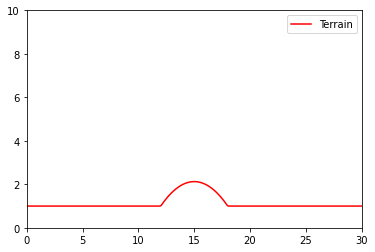

In [42]:
# Plot the solution
plt.figure()

plt.plot(xList, yList, 'r', label='Terrain')
plt.ylim([0,10])
plt.xlim([0,30])

plt.legend()